----------------------------------------- CARREGANDO DADOS -----------------------------------------

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o dataset
file_path = 'infoPedidos0918.csv'
dataset = pd.read_csv(file_path, encoding='cp1252', sep=';', decimal=',')

# Exibindo as primeiras linhas para entender a estrutura dos dados
dataset.head()

,,Pedido Id,Data/Hora,Situação,Situação.1,Situação - Transporte,Marketplace,Forma de Pagamento,Forma de Recebimento,Serviço Transportadora,Valor Produto,Valor Desconto,Valor Acréscimo,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Loja,Obs.,Origem - Pedido
0,aprovado,1451,18/09/2024 17:12,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,8.9,0.0,0,13.09,8.26,21.99,21.99,1 - Dica de Madame,1.0,Marketplace
1,aprovado,1450,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,32.9,0.0,0,26.28,14.10,59.18,59.18,1 - Dica de Madame,1.0,Marketplace
2,aprovado,1449,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,43.9,0.0,0,14.60,12.30,58.50,58.50,1 - Dica de Madame,NaN,Marketplace
3,aprovado,1448,18/09/2024 14:36,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,19.9,0.0,0,19.33,15.70,39.23,39.23,1 - Dica de Madame,NaN,Marketplace
4,aguardando-pagamento,1447,18/09/2024 13:46,1,1 - Aguardando Pagamento,Não Enviado,1 - Lojas Americanas,1 - Boleto Bancário,3 - B2W,14 - PAC - B2W Entregas,41.8,0.0,0,27.99,27.99,69.79,69.79,1 - Dica de Madame,NaN,Marketplace


------------------------------------------- TRATANDO OS DADOS -------------------------------------------

In [9]:
# Convertendo colunas de data
dataset['Data'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')


# Exibindo as primeiras linhas após as transformações
dataset.head()

,,Pedido Id,Data/Hora,Situação,Situação.1,Situação - Transporte,Marketplace,Forma de Pagamento,Forma de Recebimento,Serviço Transportadora,...,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Loja,Obs.,Origem - Pedido,Data,Proporção Frete,Proporção Frete (%)
0,aprovado,1451,18/09/2024 17:12,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,...,13.09,8.26,21.99,21.99,1 - Dica de Madame,1.0,Marketplace,2024-09-18 17:12:00,0.595271,59.53
1,aprovado,1450,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,...,26.28,14.10,59.18,59.18,1 - Dica de Madame,1.0,Marketplace,2024-09-18 16:54:00,0.444069,44.41
2,aprovado,1449,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,...,14.60,12.30,58.50,58.50,1 - Dica de Madame,NaN,Marketplace,2024-09-18 16:54:00,0.249573,24.96
3,aprovado,1448,18/09/2024 14:36,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,...,19.33,15.70,39.23,39.23,1 - Dica de Madame,NaN,Marketplace,2024-09-18 14:36:00,0.492735,49.27
4,aguardando-pagamento,1447,18/09/2024 13:46,1,1 - Aguardando Pagamento,Não Enviado,1 - Lojas Americanas,1 - Boleto Bancário,3 - B2W,14 - PAC - B2W Entregas,...,27.99,27.99,69.79,69.79,1 - Dica de Madame,NaN,Marketplace,2024-09-18 13:46:00,0.401060,40.11


In [ ]:
# Calculando o ticket médio
ticket_medio = dataset['Valor Total'].mean()

# Exibindo o resultado
print(f'Ticket Médio dos Pedidos: R$ {ticket_medio:.2f}')

In [6]:
display(dataset['Situação'].value_counts())

Situação
8     406
7     182
2     155
1       8
4       7
6       6
26      2
14      2
Name: count, dtype: int64

In [10]:
# Convertendo valores numericos
dataset['Valor Frete'] = dataset['Valor Frete'].astype(float)
dataset['Valor Total'] = dataset['Valor Total'].astype(float)

In [8]:
# Calculando a proporção do frete em relação ao valor total
dataset['Proporção Frete'] = dataset['Valor Frete'] / dataset['Valor Total']
# Transformando a proporção em porcentagem
dataset['Proporção Frete (%)'] = dataset['Proporção Frete'] * 100
dataset['Proporção Frete (%)'] = dataset['Proporção Frete (%)'].round(2)

# Exibindo as primeiras linhas para verificar
print(dataset[['Valor Frete', 'Valor Total', 'Proporção Frete (%)']].head())


   Valor Frete  Valor Total  Proporção Frete (%)
0        13.09        21.99                59.53
1        26.28        59.18                44.41
2        14.60        58.50                24.96
3        19.33        39.23                49.27
4        27.99        69.79                40.11


------------------------------------------- LIMPEZA DOS DADOS -------------------------------------------

In [ ]:
# Removendo linhas duplicadas
dataset = dataset.drop_duplicates()

In [ ]:
# Preenchendo valores nulos com a média
dataset.fillna({'Valor Frete': dataset['Valor Frete'].mean()}, inplace=True)

In [ ]:
dataset['Valor Frete'].isna()

In [11]:
# Removendo outliers usando o IQR
Q1 = dataset['Valor Total'].quantile(0.25)
Q3 = dataset['Valor Total'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando outliers
dataset = dataset[~((dataset['Valor Total'] < (Q1 - 1.5 * IQR)) | (dataset['Valor Total'] > (Q3 + 1.5 * IQR)))]

In [12]:
# Normalizando o valor total
scaler = MinMaxScaler()
dataset['Valor Total Normalizado'] = scaler.fit_transform(dataset[['Valor Total']])

In [ ]:
# Exibindo informações do dataset limpo
print(dataset.info())
print(dataset.describe())

------------------------------------------- CRIANDO VISUALIZACAO -------------------------------------------

In [ ]:
dataset['Faixa Valor Total'] = pd.cut(dataset['Valor Total'], bins=5)
dataset['Faixa Valor Total'].value_counts().plot(kind='bar')
plt.title('Frequência de Pedidos por Faixa de Valor Total')
plt.xlabel('Faixa de Valor Total')
plt.xticks(rotation= 15)
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [ ]:
dataset['Marketplace'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporção de Pedidos por Categoria')
plt.ylabel('')
plt.show()

In [ ]:
sns.boxplot(data=dataset, x='Valor Total')
plt.title('Distribuição do Valor Total dos Pedidos')
plt.xlabel('Valor Total (R$)')
plt.show()

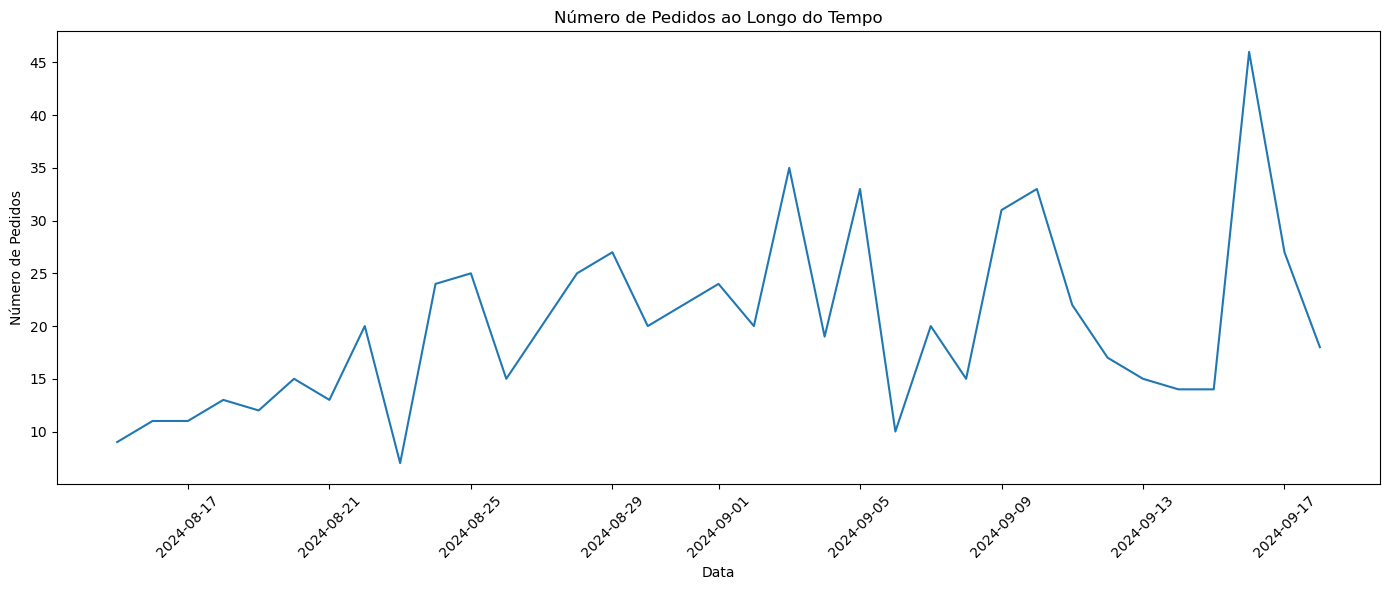

In [14]:
# Converter a coluna 'Data/Hora' para datetime
dataset['Data'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')

# Definir o índice como a coluna de data
dataset.set_index('Data', inplace=True)

# Resumir por dia
daily_orders = dataset.resample('D').size()

# Ajustar o tamanho da figura
plt.figure(figsize=(14, 6))  # Largura 14, Altura 6

# Plotar o gráfico
plt.plot(daily_orders)
plt.title('Número de Pedidos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

In [ ]:
sns.scatterplot(data=dataset, x='Valor Total', y='Valor Frete', alpha=0.5)
plt.title('Comparação do Valor do Frete com o Valor Total do Pedido')
plt.xlabel('Valor Total do Pedido (R$)')
plt.ylabel('Valor do Frete (R$)')
plt.show()

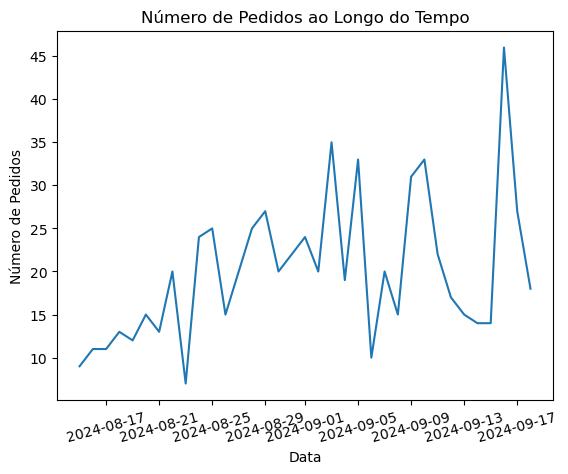

In [15]:
dataset['Data'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')
dataset.set_index('Data', inplace=True)

# Resumir por dia
daily_orders = dataset.resample('D').size()

plt.plot(daily_orders)
plt.title('Número de Pedidos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation= 15)
plt.show()

/tmp/ipykernel_55902/1929336822.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataset.set_index('Data/Hora').resample('M')['Valor Total'].sum().plot(kind='line')


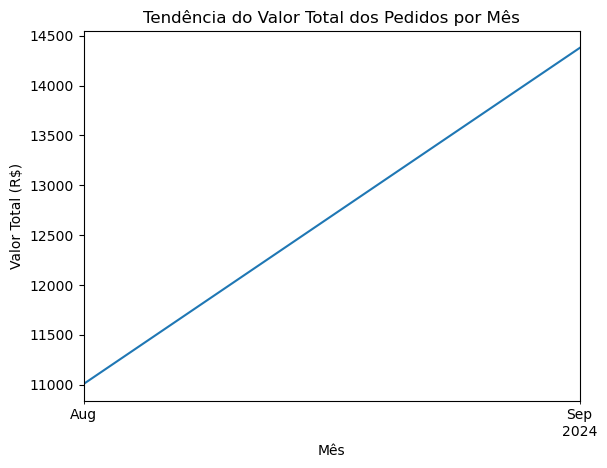

In [22]:
dataset['Data/Hora'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')
dataset.set_index('Data/Hora').resample('M')['Valor Total'].sum().plot(kind='line')
plt.title('Tendência do Valor Total dos Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total (R$)')
plt.show()